In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [33]:
import numpy as np
import os
import sklearn.linear_model
import matplotlib.pyplot as plt
import math
import scipy

target_directory = './resources/run_2'
target_filename = 'full'

X_data = np.genfromtxt(os.path.join(target_directory, target_filename+"_trainX.csv"), delimiter=',')
Y_data = np.genfromtxt(os.path.join(target_directory, target_filename+"_trainY.csv"), delimiter=',')

print('Succesfully imported dataset with of size {0}'.format(X_data.shape))

rangefinder_bearings = np.arange(0, 20)/19.0*math.pi-math.pi/2

Succesfully imported dataset with of size (1943053, 20)


In [3]:
def run_linear_regression(X_data, Y_data):
    
    # we weight the samples by how aggresively the controller needs to behave, 
    #   with a small non-negative weight for everything
    # TODO: perhaps because of the nature of our data we are overweighting those situations 
    #   in which you don't encounter any obstacles?
    sample_weight = np.abs(Y_data) + 0.25*np.max(Y_data)
    
    y_buckets = sorted(set(Y_data))
    
    lr = sklearn.linear_model.LinearRegression()
    lr.fit(X_data, Y_data, sample_weight)

    
    
    print ("Regression weights for features = ")
    print lr.coef_
    
    print ("r-value")
    print lr.score(X_data, Y_data, sample_weight)
    
    fig1, ax1 = plt.subplots()
    ax1.scatter(rangefinder_bearings, lr.coef_)
    plt.show()

    Y_predicted = lr.predict(X_data)

    # visualizing the difference between the actual and predicted values
    
    d=dict()
    for b in y_buckets:
        d[b] = Y_predicted[Y_data == b]

    fig2, ax2 = plt.subplots()
    ax2.violinplot(d.values(), positions = d.keys(), showmeans = True, showextrema = False)
    ax2.set_xlabel('DP Controller')
    ax2.set_ylabel('Reactive Controller')
    ax2.set_ylim([min(y_buckets), max(y_buckets)])
    ax2.set_aspect('equal')
    plt.show()

In [30]:
def run_logistic_regression(X_data, Y_data):
    """
    TODO: provide better documentation; this is not in fact the commonly known logistic regression
    """
    
    Yt = np.power(Y_data, 3)
    # Yt = scipy.special.cbrt(Y_data)
    
    # we weight the samples by how aggresively the controller needs to behave, 
    #   with a small non-negative weight for everything
    # TODO: perhaps because of the nature of our data we are overweighting those situations 
    #   in which you don't encounter any obstacles?
    # sample_weight = np.abs(Y_data) + 0.25*np.max(Y_data)
    
    y_buckets = sorted(set(Y_data))
    
    lr = sklearn.linear_model.LinearRegression()
    lr.fit(X_data, Yt)

    
    
    print ("Regression weights for features = ")
    print lr.coef_
    
    print ("r-value")
    print lr.score(X_data, Yt)
    
    fig1, ax1 = plt.subplots()
    ax1.scatter(rangefinder_bearings, lr.coef_)
    plt.show()

    Yt_predicted = lr.predict(X_data)
    Y_predicted = scipy.special.cbrt(Yt_predicted)
    # Y_predicted = np.power(Yt_predicted, 3)

    # visualizing the difference between the actual and predicted values
    
    d=dict()
    for b in y_buckets:
        d[b] = Y_predicted[Y_data == b]

    fig2, ax2 = plt.subplots()
    ax2.violinplot(d.values(), positions = d.keys(), showmeans = True, showextrema = False)
    ax2.set_xlabel('DP Controller')
    ax2.set_ylabel('Reactive Controller')
    ax2.set_ylim([min(y_buckets), max(y_buckets)])
    ax2.set_aspect('equal')
    plt.show()

Regression weights for features = 
[-0.02269553 -0.01597569 -0.0230898  -0.03231766 -0.04123514 -0.05450834
 -0.07090724 -0.0830703  -0.08194707 -0.04278001  0.04210468  0.08603945
  0.08431365  0.06857362  0.05490925  0.04112036  0.03142938  0.022427
  0.01515119  0.02333842]
r-value
0.558198449303


<IPython.core.display.Javascript object>


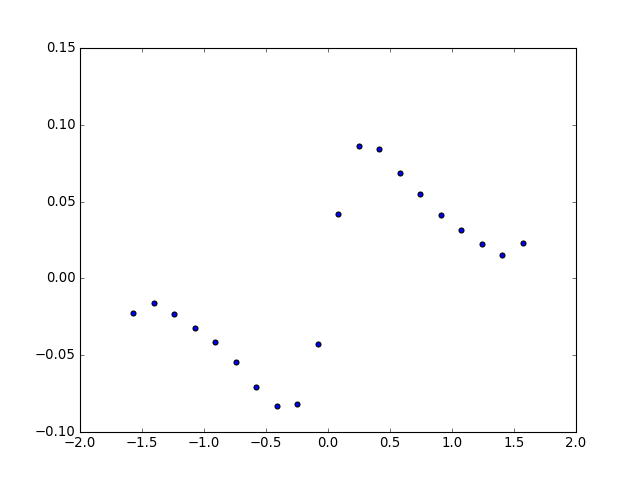

<IPython.core.display.Javascript object>


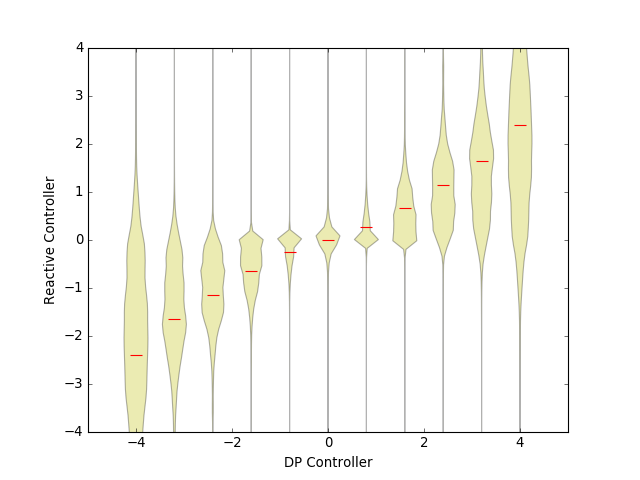

In [34]:
run_linear_regression(X_data, Y_data)

Regression weights for features = 
[-0.12820739 -0.11653007 -0.18012205 -0.29509318 -0.43459486 -0.64483216
 -0.93072812 -1.14679293 -1.19636129 -0.62109231  0.61424212  1.24851301
  1.16859892  0.89921882  0.64799494  0.43062646  0.28780376  0.17586158
  0.10444544  0.13586271]
r-value
0.507934341117


<IPython.core.display.Javascript object>


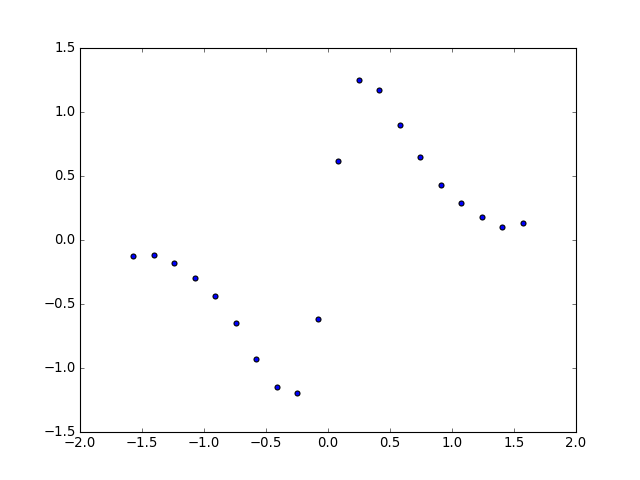

<IPython.core.display.Javascript object>


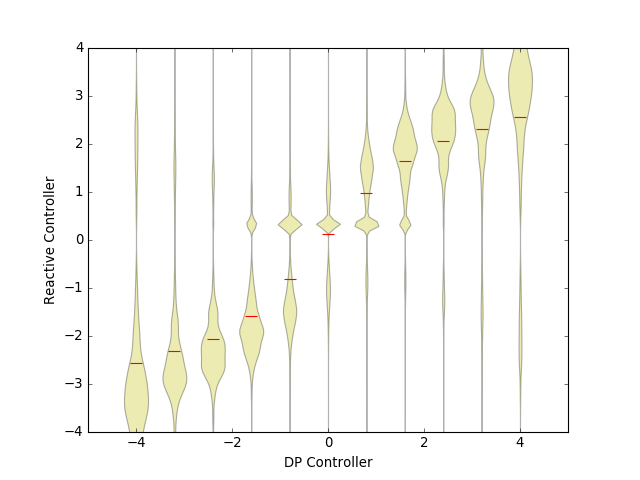

In [35]:
run_logistic_regression(X_data, Y_data)

Regression weights for features = 
[ 0.67801216  0.09404621  0.26010682  0.34794958  0.52212791  0.83227744
  1.55728873  2.35852681  2.84985869  1.41906432 -1.37474929 -2.94043544
 -2.44304815 -1.41812443 -0.89242503 -0.5424132  -0.32551604 -0.17111675
 -0.13253445 -0.69287803]
r-value
0.200593366649


<IPython.core.display.Javascript object>


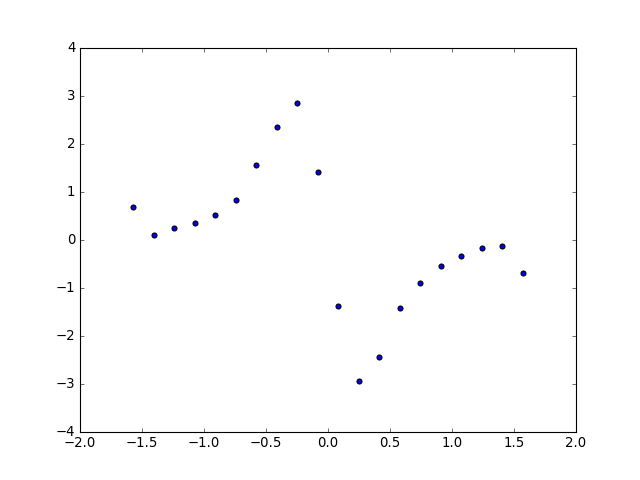

<IPython.core.display.Javascript object>


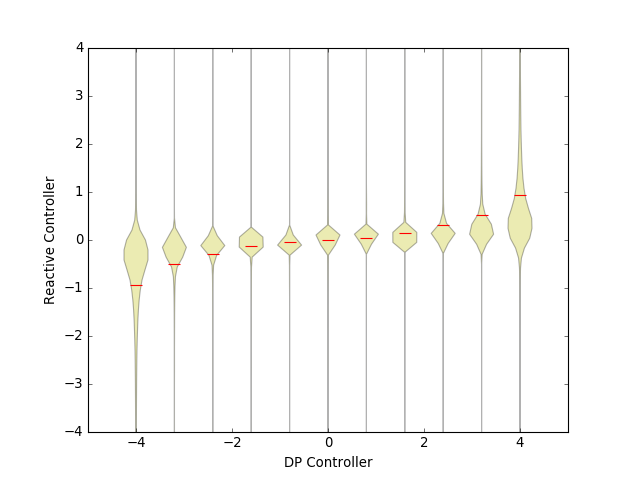

In [22]:
X_features = X_data**(-1)
cap = np.array([1])
X_capped = np.minimum(cap, X_features)
run_linear_regression(X_capped, Y_data)

Regression weights for features = 
[ -4.24024293e-05  -3.77577800e-05  -5.34051110e-05  -7.41927314e-05
  -9.60329416e-05  -1.23734453e-04  -1.52172207e-04  -1.68049979e-04
  -1.53122692e-04  -7.81028953e-05   7.78999539e-05   1.60691575e-04
   1.69868410e-04   1.49521025e-04   1.23502801e-04   9.54336362e-05
   7.24562315e-05   5.20114028e-05   3.56561843e-05   4.38290345e-05]
r-value
0.627973513698


<IPython.core.display.Javascript object>


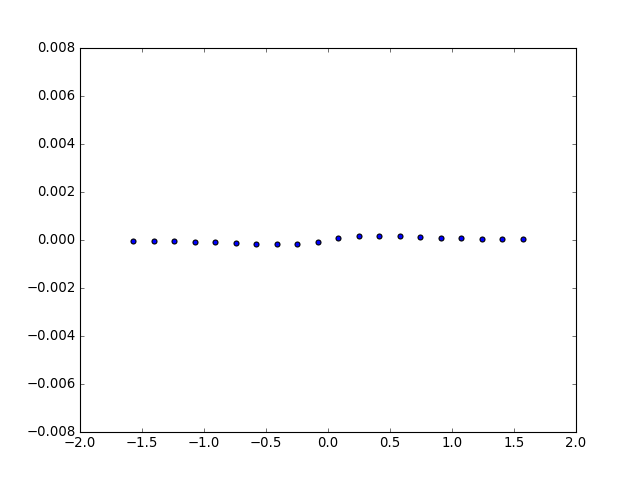

<IPython.core.display.Javascript object>


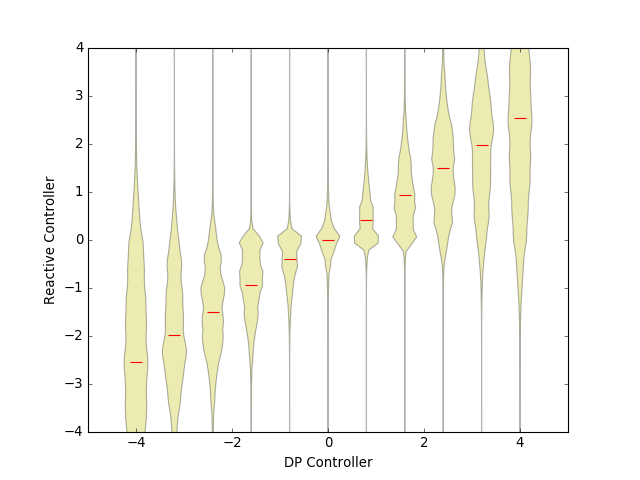

In [24]:
X_features = X_data**(3)
run_linear_regression(X_features, Y_data)

In [18]:
max(Y_data)

4.0

In [22]:
np.power(-1, 1/3.0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


nan

In [32]:
np.array([1,1,1]) == 1

array([ True,  True,  True], dtype=bool)